In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_datareader import data
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn import linear_model
from tqdm.notebook import tqdm

In [2]:
fig_size_1 = (12, 4)
fig_size_2 = (8, 4)
fig_size_3 = (6, 6)
three_months = (datetime.today()-relativedelta(months=3)).strftime('%Y-%m-%d')
six_months = (datetime.today()-relativedelta(months=6)).strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(years=1)).strftime('%Y-%m-%d')
today = datetime.today().strftime('%Y-%m-%d')

start_date = one_year
end_date = today

In [3]:
tickers = ['AMZN', 'AAPL', 'FB', 'GOOGL', 'MSFT', 'UBER',
           'XOM', 'BA', 'DAL', 'UAL', 'AAL',
           'XLE', 'XLU', 'IVV', 'VNQ', 'VCSH',
           'BABA', 'JD']

num_shares = {'AMZN': 17, 'AAPL': 208, 'FB': 74, 'GOOGL': 10, 'MSFT': 87, 'UBER': 554,
              'XOM': 361, 'BA': 87, 'DAL': 141, 'UAL': 129, 'AAL': 316,
              'XLE': 431, 'XLU': 56, 'IVV': 22, 'VNQ': 59, 'VCSH': 128,
              'BABA': 73, 'JD': 54,
              'CASH': (67877.80+62036.44+16000)}

cost_basis = {'AMZN': 1708.54, 'AAPL': 45.57, 'FB': 168.62, 'GOOGL': 1110.79, 'MSFT': 95.20, 'UBER': 21.65,
              'XOM': 41.51, 'BA': 137.98, 'DAL': 23.61, 'UAL': 25.73, 'AAL': 10.54,
              'XLE': 30.12, 'XLU': 59.49, 'IVV': 247.73, 'VNQ': 75.16, 'VCSH': 78.05,
              'BABA': 218.03, 'JD': 72.91, 
              'CASH': 1}

asset_type = {'AMZN': 'Stock', 'AAPL': 'Stock', 'FB': 'Stock', 'GOOGL': 'Stock', 'MSFT': 'Stock', 'UBER': 'Stock',
              'XOM': 'Stock', 'BA': 'Stock', 'DAL': 'Stock', 'UAL': 'Stock', 'AAL': 'Stock',
              'XLE': 'Sector', 'XLU': 'Sector', 'IVV': 'Index', 'VNQ': 'REIT', 'VCSH': 'Bond',
              'BABA': 'Stock', 'JD': 'Stock',
              'CASH': 'Cash'}

In [4]:
df = pd.DataFrame()

for ticker in tqdm(tickers):
    df_temp = data.DataReader(ticker, 'yahoo', start_date, end_date).reset_index()[['Date', 'Close']]
    df_temp['Ticker'] = [ticker] * len(df_temp)
    df_temp['Shares'] = [num_shares[ticker]] * len(df_temp)
    df_temp['Type'] = [asset_type[ticker]] * len(df_temp)
    df_temp['Cost'] = [cost_basis[ticker]] * len(df_temp)
    df = df.append(df_temp)

df = df.append({'Ticker': 'CASH', 'Date' : df['Date'].max() , 'Close' : 1, 'Shares': num_shares['CASH'],
                'Type': asset_type['CASH'], 'Cost': cost_basis['CASH']}, ignore_index=True)

df['Mkt Val'] = df['Shares'] * df['Close']
df['Cost Basis'] = df['Shares'] * df['Cost']
df['Change'] = df['Mkt Val'] - df['Cost Basis']
df['Change %'] = 100*df['Change']/df['Cost Basis']

df_final = df.groupby(['Ticker']).tail(1).set_index('Ticker')
df_final['Mkt Val %'] = 100*df_final['Mkt Val']/df_final['Mkt Val'].sum()
df_final['Cost Basis %'] = 100*df_final['Cost Basis']/df_final['Cost Basis'].sum()
df_final = df_final.round(2)
df_final.sort_values(by='Mkt Val %', ascending=False)

  0%|          | 0/18 [00:00<?, ?it/s]

,Date,Close,Shares,Type,Cost,Mkt Val,Cost Basis,Change,Change %,Mkt Val %,Cost Basis %
Ticker,,,,,,,,,,,
CASH,2021-05-25,1.00,145914.24,Cash,1.00,145914.24,145914.24,0.00,0.00,31.72,45.41
AMZN,2021-05-25,3239.34,17.00,Stock,1708.54,55068.86,29045.18,26023.68,89.60,11.97,9.04
UBER,2021-05-25,50.90,554.00,Stock,21.65,28198.60,11994.10,16204.50,135.10,6.13,3.73
AAPL,2021-05-25,126.85,208.00,Stock,45.57,26384.80,9478.56,16906.24,178.36,5.74,2.95
FB,2021-05-25,326.69,74.00,Stock,168.62,24175.06,12477.88,11697.18,93.74,5.26,3.88
GOOGL,2021-05-25,2362.00,10.00,Stock,1110.79,23620.00,11107.90,12512.10,112.64,5.13,3.46
XLE,2021-05-25,51.85,431.00,Sector,30.12,22345.20,12981.72,9363.48,72.13,4.86,4.04
MSFT,2021-05-25,251.54,87.00,Stock,95.20,21883.98,8282.40,13601.58,164.22,4.76,2.58
XOM,2021-05-25,58.33,361.00,Stock,41.51,21057.38,14985.11,6072.27,40.52,4.58,4.66


<AxesSubplot:title={'center':'Change'}, xlabel='Ticker'>

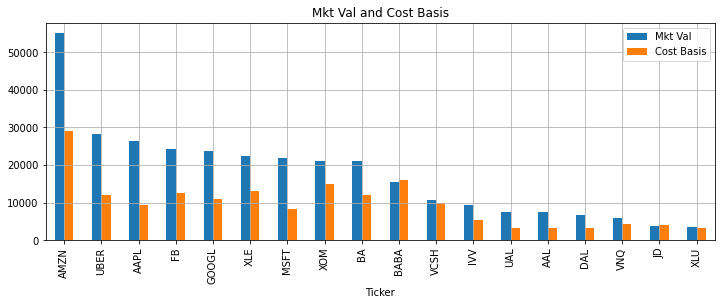

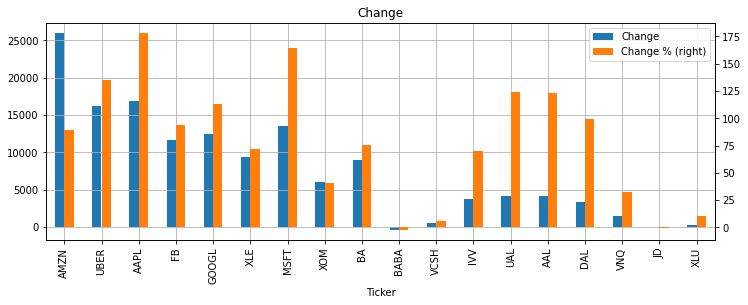

In [5]:
df_final[df_final['Cost'] != 1].sort_values(by='Mkt Val', ascending=False).plot(
    y=['Mkt Val', 'Cost Basis'],
    kind='bar', figsize=fig_size_1, grid=True,
    title='Mkt Val and Cost Basis')
df_final[df_final['Cost'] != 1].sort_values(by='Mkt Val', ascending=False).plot(
    y=['Change', 'Change %'], secondary_y='Change %',
    kind='bar', figsize=fig_size_1, grid=True,
    title='Change')

In [6]:
df_final_type = df_final.groupby('Type').sum()[['Mkt Val', 'Cost Basis']]
df_final_type['Mkt Val %'] = 100*df_final_type['Mkt Val']/df_final_type['Mkt Val'].sum()
df_final_type['Cost Basis %'] = 100*df_final_type['Cost Basis']/df_final_type['Cost Basis'].sum()
df_final_type['Change'] = df_final_type['Mkt Val'] - df_final_type['Cost Basis']
df_final_type['Change %'] = 100 * df_final_type['Change'] / df_final_type['Cost Basis']
df_final_type = df_final_type.round(2)
df_final_type

,Mkt Val,Cost Basis,Mkt Val %,Cost Basis %,Change,Change %
Type,,,,,,
Bond,10605.44,9990.40,2.31,3.11,615.04,6.16
Cash,145914.24,145914.24,31.72,45.41,0.00,0.00
Index,9258.26,5450.06,2.01,1.70,3808.20,69.87
REIT,5867.55,4434.44,1.28,1.38,1433.11,32.32
Sector,26014.88,16313.16,5.66,5.08,9701.72,59.47
Stock,262369.72,139207.54,57.03,43.33,123162.18,88.47


<AxesSubplot:title={'center':'Change'}, xlabel='Type'>

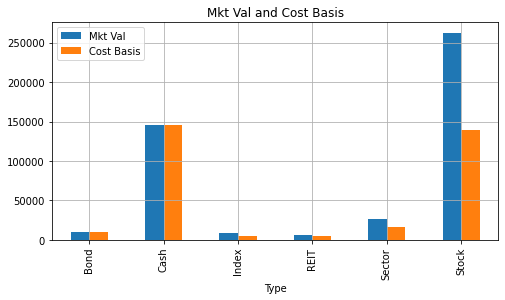

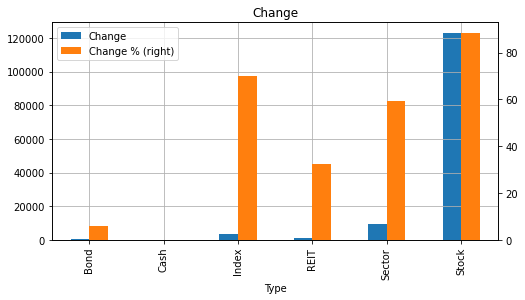

In [7]:
df_final_type.plot(y=['Mkt Val', 'Cost Basis'],
                   kind='bar', figsize=fig_size_2, grid=True,
                   title='Mkt Val and Cost Basis')
df_final_type.plot(y=['Change', 'Change %'], secondary_y=['Change %'],
                   kind='bar', figsize=fig_size_2, grid=True,
                   title='Change')

In [8]:
print('Portfolio value:', round(df_final_type['Mkt Val'].sum(), 2))
print('Cost basis:', round(df_final_type['Cost Basis'].sum(), 2))
print('Change:', round(df_final_type['Change'].sum(), 2))
print('Change %:', round(100*df_final_type['Change'].sum()/df_final_type['Cost Basis'].sum(), 2))

Portfolio value: 460030.09
Cost basis: 321309.84
Change: 138720.25
Change %: 43.17


Chg Portfolio: 4.33
Chg IVV: 9.65
Std dev portfolio 0.769
Std dev IVV 0.881
Beta: 0.399


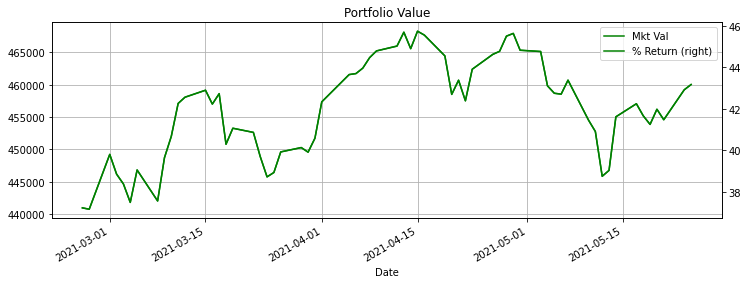

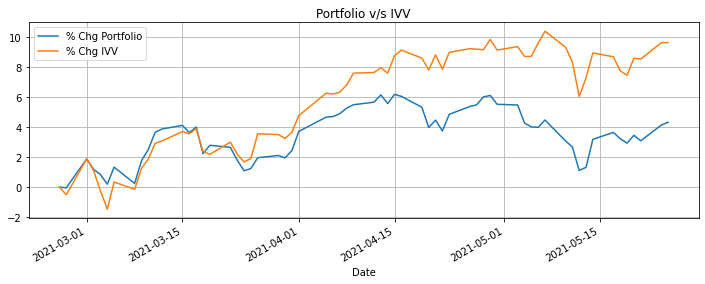

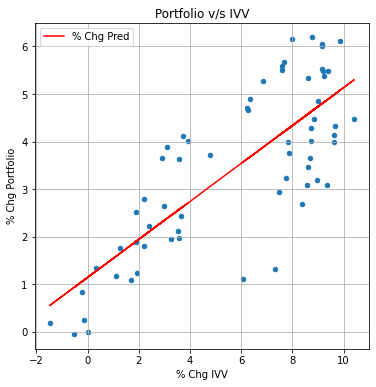

In [9]:
mkt_val = (df[df['Ticker'] != 'CASH'].groupby('Date').sum()['Mkt Val']) + df[df['Ticker'] == 'CASH'][['Mkt Val']].values[0]
mkt_val = mkt_val.reset_index()

cost_basis = (df[df['Ticker'] != 'CASH'].groupby('Date').sum()['Cost Basis']) + df[df['Ticker'] == 'CASH'][['Cost Basis']].values[0]
cost_basis = cost_basis.reset_index()

period = three_months

dff = mkt_val[(mkt_val['Date'] >= period) & (mkt_val['Date'] <= end_date)].set_index('Date')
dff['Cost Basis'] = cost_basis[(cost_basis['Date'] >= period) & (cost_basis['Date'] <= end_date)].set_index('Date')['Cost Basis']

dff['Return'] = dff['Mkt Val'] - dff['Cost Basis']
dff['% Return'] = 100*(dff['Mkt Val'] - dff['Cost Basis'])/dff['Cost Basis']
dff['% Chg Portfolio'] = 100*(dff['Mkt Val']-dff.head(1)['Mkt Val'].values[0])/dff.head(1)['Mkt Val'].values[0]
dff['Close IVV'] = df[(df['Ticker'] == 'IVV') & (df['Date'] >= period) & (df['Date'] <= end_date)][['Date', 'Close']].set_index('Date')
dff['% Chg IVV'] = 100*(dff['Close IVV']-dff.head(1)['Close IVV'].values[0])/dff.head(1)['Close IVV'].values[0]

model = linear_model.LinearRegression()
model.fit(np.array(dff[['% Chg IVV']]), np.array(dff[['% Chg Portfolio']]))

dff['% Chg Pred'] = model.predict(np.array(dff[['% Chg IVV']]))
dff = dff.round(2)

dff.plot(y=['Mkt Val', '% Return'], secondary_y='% Return', color=['green', 'green'],
         figsize=fig_size_1, grid=True, title='Portfolio Value')

dff.plot(y=['% Chg Portfolio', '% Chg IVV'], figsize=fig_size_1, grid=True, title='Portfolio v/s IVV')

fig, axes = plt.subplots(sharex=True)
dff.plot(x='% Chg IVV', y='% Chg Portfolio', kind='scatter',
         ax=axes, figsize=fig_size_3, grid=True, title='Portfolio v/s IVV')
dff.plot(x='% Chg IVV', y='% Chg Pred', kind='line', color='Red',
         ax=axes, figsize=fig_size_3, grid=True, title='Portfolio v/s IVV')

print('Chg Portfolio:', dff.tail(1)['% Chg Portfolio'].values[0])
print('Chg IVV:', dff.tail(1)['% Chg IVV'].values[0])

print('Std dev portfolio', round(100*dff.pct_change().std()['Mkt Val'], 3))
print('Std dev IVV', round(100*dff.pct_change().std()['Close IVV'], 3))

print('Beta:', round(model.coef_[0][0], 3))